In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import files
uploaded = files.upload()  # Upload train.csv file here

import io
filename = list(uploaded.keys())[0]   # Automatically use the uploaded filename
df = pd.read_csv(io.BytesIO(uploaded[filename]))



Saving train.csv to train (1).csv


In [13]:
# EDA
df.info()
df.describe()

# Checks the missing values
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [16]:
# Select and clean data
data = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
data = data.dropna()

# Features and Target
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2806426667.247853


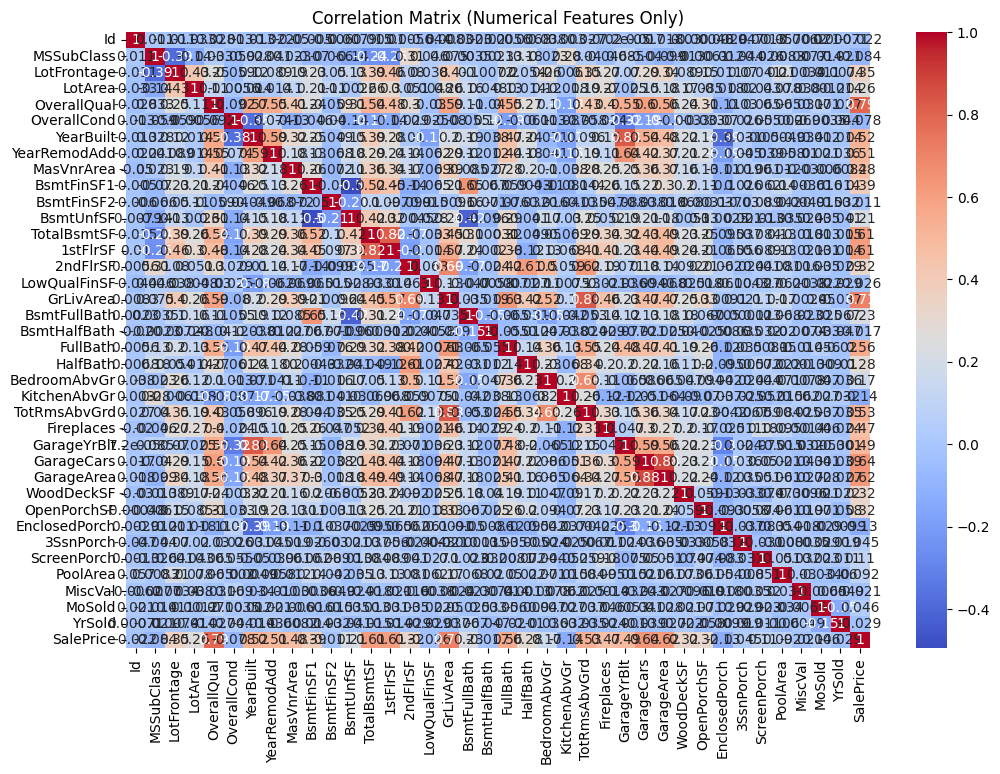

In [3]:
# It will only select the numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Making the Correlation matrix
correlation_matrix = numeric_df.corr()

# It will the plot the Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


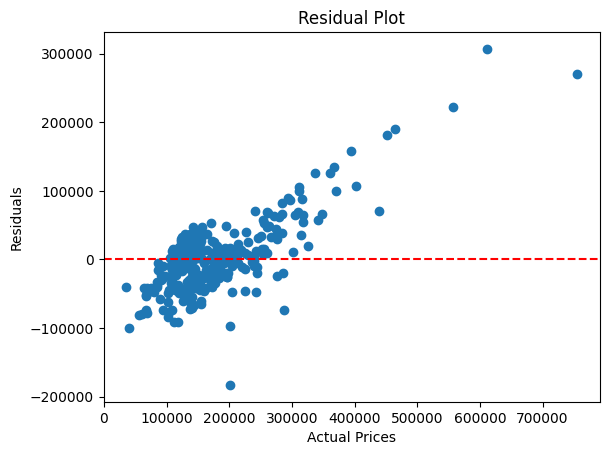

In [5]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


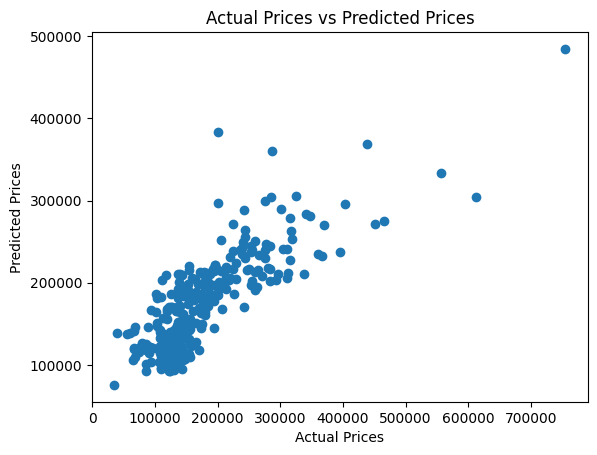

In [6]:
# Prediction and Visualization
# The Actual vs Predicted Plot will shows how closely the model’s predictions
# match real house prices
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()